In [1]:
from __future__ import division

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
plt.style.use('ggplot')

In [85]:
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.facecolor']='white'
mpl.rcParams['axes.edgecolor']='k'
mpl.rcParams['axes.linewidth']=3
mpl.rcParams['font.size']=12
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['text.color'] = 'k'
#mpl.rcParams['xtick.major.width'] = 2
#mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.major.size'] = 3.6
mpl.rcParams['ytick.major.size'] = 3.6
mpl.rcParams['xtick.color']='k'
mpl.rcParams['ytick.color']='k'
mpl.rcParams['axes.labelcolor']='k'

In [86]:
def makeCmap(hexColour,name,zeroColour='#FFFFFF'):
    r0,g0,b0=mpl.colors.hex2color(zeroColour)
    r,g,b=mpl.colors.hex2color(hexColour)
    cdict = {'red':   ((0.0, r0, r0),
                   (1.0, r, r)),
         'green': ((0.0, g0, g0),
                   (1.0, g, g)),
         'blue':  ((0.0, b0, b0),
                   (1.0, b, b))
        }
    cmap = mpl.colors.LinearSegmentedColormap(name,cdict)
    return cmap

In [118]:
files=['darkMatter','galaxies','SMBHs','blackHoles','chabrierImf',
       'planetsRVbins','planetsRVbins_univ','planetsMicrolensing','planetsMicrolensing_univ']
colours=['#941B0C','#F6AA1C','#220901','k','b','#1A936F','#114B5F','#EE964B','#F95738']
text=['Dark Matter Halos',r'Galaxies ($M_*$)','Black Holes','BH total','Chabrier',
      'RV planets [solar neighborhood]','RV planets [universe]',
     'Microlensing planets [Milky Way]','Microlensing planets [universe]']
textPos=[[1e11,1e-20],[1e11,1e-18],[1e11,1e-16],[1e11,1e-14],[1e11,1e-12],[1e11,1e-10],[1e11,1e-8],[1e11,1e-6],[1e11,1e-4]]

In [119]:
def plotBackground(thisPlot,x0,y0,colour,zorder0):
    cmap=makeCmap('#011627','name')
    yMin=y0*np.power(x0/1e20,2)
    yMax=y0*np.power(x0/1e-20,2)
    nColours=25
    change=0.01
    for i in range(nColours-1):
        thisPlot.fill([1e-20,1e-20,1e20],[yMax*change**(i),yMin*change**(i),yMin*change**(i)],c=cmap((i+1)/nColours),zorder=(i+1)+zorder0)
    
    newZord = i+1+zorder0
    return thisPlot, newZord

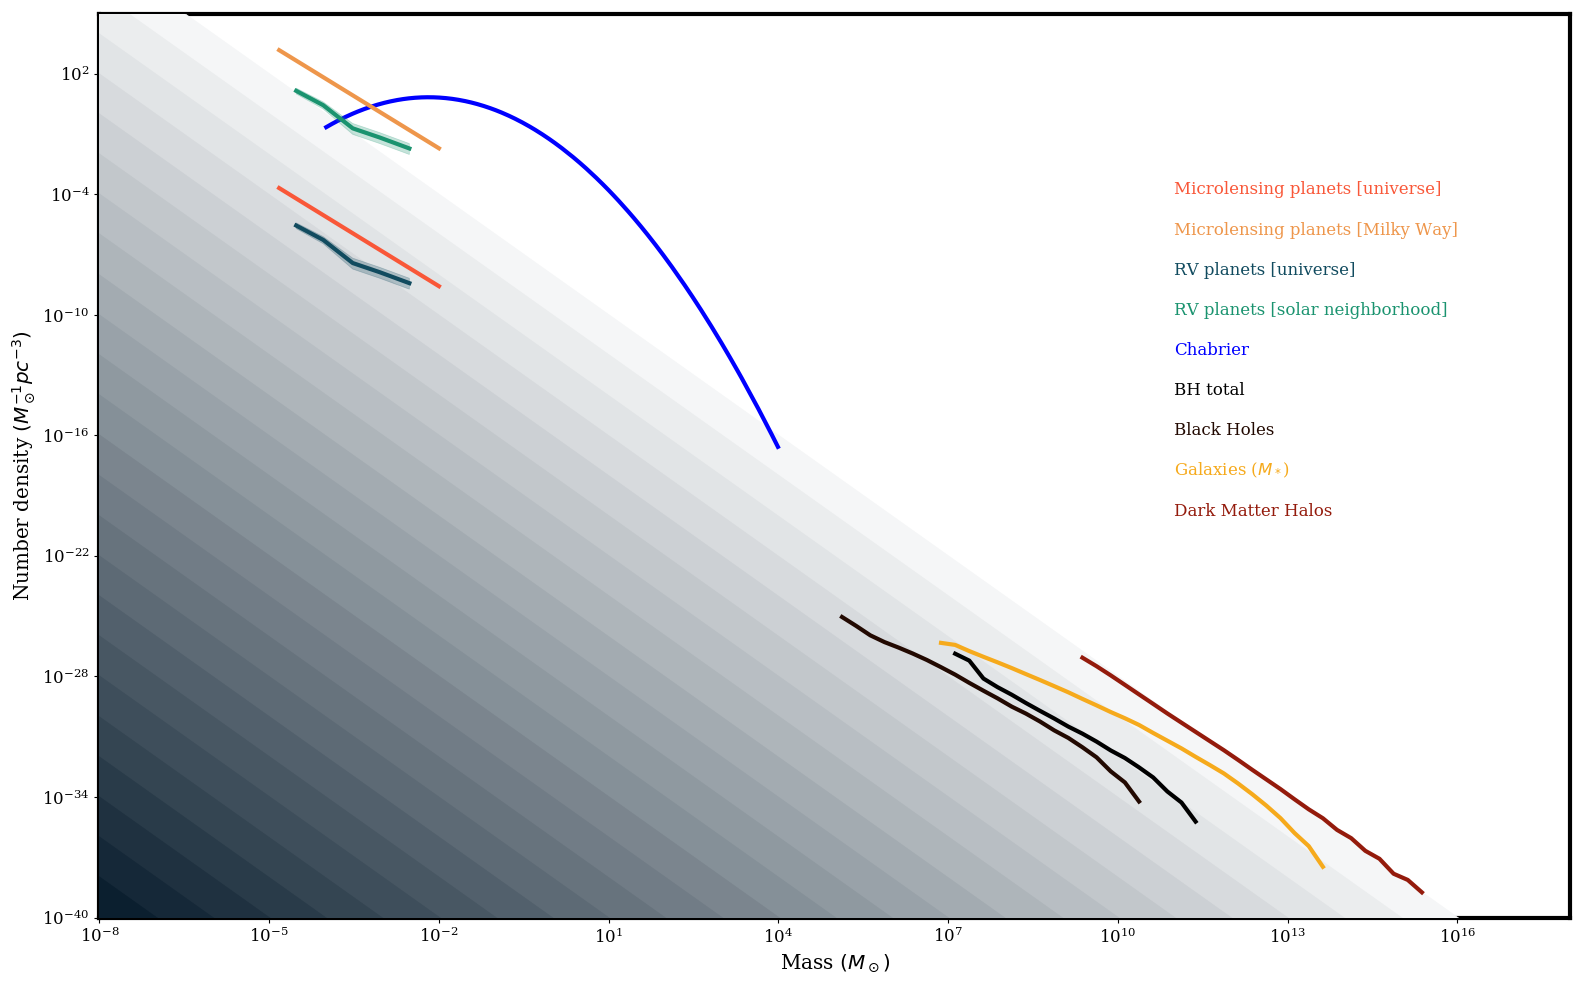

In [120]:
zord = 2

fig = plt.figure(figsize=(16,10))
nPlot = plt.gca()

nPlot, zord = plotBackground(nPlot,1e16,1e-40,'k',zorder0=zord)

for index,field in enumerate(files):
    data=np.genfromtxt('data/'+field+'.txt')
    nPlot.plot(data[:,0],data[:,1],c=colours[index],zorder=zord)
    zord+=1
    nPlot.text(textPos[index][0],textPos[index][1],text[index],color=colours[index])
    if np.shape(data)[1] > 2: #if uncertainty columns are included
        xs = np.concatenate((data[:,0],data[:,0][::-1]))
        ys = np.concatenate(((data[:,1]+data[:,2]),(data[:,1]-data[:,3])[::-1]))
        nPlot.fill(xs, ys, c=colours[index],alpha=0.25,zorder=zord)
        zord+=1
        
nPlot.set_xscale('log')
nPlot.set_yscale('log')
nPlot.set_ylim(1e-40,1e5)
nPlot.set_xlim(1e-8,1e18)
nPlot.set_xlabel(r'Mass $(M_\odot)$')
nPlot.set_ylabel(r'Number density $(M_\odot^{-1} pc^{-3})$')
nPlot.grid("off")

plt.tight_layout()
plt.savefig('plot.pdf')
plt.show()

In [ ]:
# one annoying thing about the above plot is that it doesn't seem to be possible to drawn the axes on top of the shaded triangles...

# another thing to do: Once various planet lines are on there, see if they add up to the total predicted by the planet simulation paper